## Here, we Draw the initial graph of the eyegaze time in respect to frame no. 

618
618


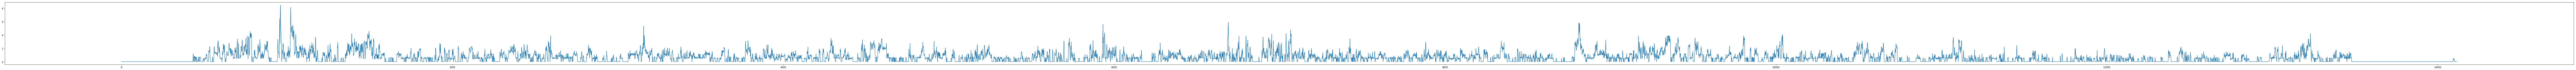

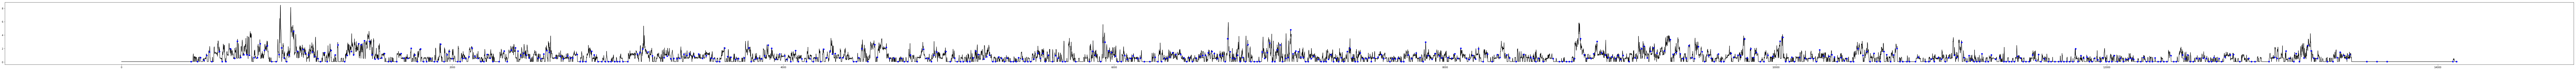

In [16]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

# Eye gaze Data log file
eyegaze = genfromtxt('./Bladerunner_eyegaze.csv', delimiter=',')

# Scene Boundary log file
scene_file = open("./scene_boundary_2fps.csv", 'r')

for line in scene_file:
    scene_delimeters = line.split(',')
    
''' Calculating Scence boundary in seconds '''
scene_boundary_frames = []  # scene boundary in frames logged in this list
scene_boundary_secs = [] #scene boundary in seconds 
no_scene_boundary = len(scene_delimeters)
for time in scene_delimeters:
    time_parse = time.strip().split(":")
    hour, minute, second = int(time_parse[0]), int(time_parse[1]), float(time_parse[2])
    time_in_secs = hour*3600 + minute*60 + second
    frame = int(time_in_secs*2)
    scene_boundary_frames.append(frame)
    scene_boundary_secs.append(time_in_secs)
print(len(scene_boundary_frames))
print(len(scene_boundary_secs))
# Plotting just eyegaze data   
plt.figure(figsize=(200,5))
plt.plot(range(len(eyegaze)), eyegaze)
plt.show()

# Plotting eyegaze data with scene boundaries
np_scene_boundary = np.array(scene_boundary_frames)
plt.figure(figsize=(200,5))
plt.plot(range(len(eyegaze)), eyegaze,'k', np_scene_boundary, eyegaze[np_scene_boundary],'bo')
plt.show()

## Divide Eyegaze data into individual scenes|

In [15]:
list_of_scene_gazedata = []

prev_bound = 0
for i, bound_frame in enumerate(scene_boundary_frames):
    list_of_scene_gazedata.append(np.array(eyegaze[prev_bound:scene_boundary_frames[i]]))
    prev_bound = bound_frame

print(len(list_of_scene_gazedata))

618


# Linear Regression of Each Scene

In [32]:
from scipy import stats

list_of_slope = []
list_of_intercept = []
print(np.arange(0,5,0.5))
prev_time = 0
for i, scene_gaze in enumerate(list_of_scene_gazedata):
    this_time = scene_boundary_secs[i]
    x = np.arange(prev_time, this_time, 0.5)
    y = scene_gaze
    list_of_x.append(x)
    list_of_y.append(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    list_of_slope.append(slope)
    list_of_intercept.append(intercept)
    prev_time = this_time
    
final_feature = np.array(list_of_slope)
print(final_feature)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
[  0.00000000e+00   1.26611741e-02   5.50681115e-02   1.03566234e-02
   1.13229902e-01   1.27810588e-01  -2.96963571e-01   1.04262872e-01
  -1.49661275e-01  -7.91721344e-02   1.14052503e-01  -1.10646923e-01
   5.98627451e-02  -1.50800000e-01  -5.25712281e-02   6.13168215e-03
   6.72576471e-02  -3.30047009e-01  -6.55400000e-02   1.42836765e-01
  -3.86314530e-02   5.27774510e-02  -1.58275214e-01   0.00000000e+00
   2.69012590e-01   5.09935000e-01   1.41427143e-01  -1.77407353e-01
   1.29908571e-01   2.42553724e-01  -1.93258696e-01   3.95560160e-02
  -4.80142857e-03  -7.79550877e-02   1.28367984e-01  -1.38580000e-01
  -1.03056842e-01  -3.99514286e-02   1.21628855e-01  -4.67285714e-03
   1.43221542e-01  -2.02230769e-03   1.81549510e-01  -2.68734897e-02
   2.01507353e-01   7.17130435e-04  -1.62585714e-01   1.22127253e-02
  -8.12352941e-04  -3.65687719e-02   1.64724435e-01  -1.24228571e-01
  -5.54883385e-02  -3.67669173e-04  -1.57566617e-01

## Trying out scipy linear regression 

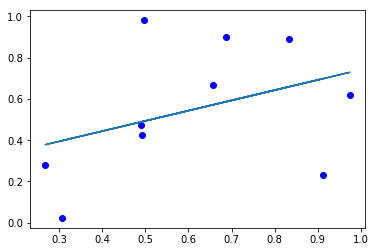

0.497086083702


In [9]:
from scipy import stats
import numpy as np

x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def f(_x):
    return slope*_x+intercept

plt.plot(x,y,'ob', x, f(x))
plt.show()
print(slope)

In [8]:
scene_file = open("./scene_boundary_2fps.csv", 'r')
line_cnt = 0

for line in scene_file:
    scene_delimeters = line.split(',')
    line_cnt +=1
# print(line_cnt)
# print(scene_delimeters)

scene_boundary_frames = []
time_btw_scenes = []
for time in scene_delimeters:
    time_parse = time.strip().split(":")
    hour, minute, second = int(time_parse[0]), int(time_parse[1]), float(time_parse[2])
    time_in_secs = hour*3600 + minute*60 + second
    frame = int(time_in_secs*2)
    scene_boundary_frames.append(frame)
# print(scene_boundary_frames)

for i, time in enumerate(scene_boundary_frames):
    if(i==0):
        continue
    time_btw_scenes.append((scene_boundary_frames[i]-scene_boundary_frames[i-1])/2)

import numpy as np
scene_time = np.array(time_btw_scenes)

print(scene_time)

print(np.mean(scene_time))
    

[  19.5    9.    10.5    8.5    8.     7.5   22.5    8.5   11.5   13.5
   12.5    8.5   10.     9.5    9.     8.    13.5   10.5    8.5   13.
    8.5   13.5   13.     9.     7.5    7.5    8.     7.5   13.5   11.5
   16.5    7.5    9.5   11.5    7.5    9.5    7.5   13.     7.5   11.5
   12.5    8.5   20.     8.    12.     7.5   15.     8.     9.5   15.5
    7.5    9.    10.    10.     8.5   11.5    9.    16.5   13.     8.5
   12.    10.    11.     8.     9.5    9.     9.5   11.5   12.     9.
    9.5   10.5    9.     7.5    8.    17.     7.5    7.5    8.5   10.    10.
    8.5    9.     9.     9.     9.5    9.     9.    18.5   15.     9.5
   12.5   12.     8.     8.     9.     9.     9.    26.5    8.     8.5
    9.     8.5   18.5   14.     9.    13.     8.     7.5   13.     9.5
    7.5   10.    17.     8.    11.5   11.    11.     9.5    7.5   11.     8.
    7.5    9.5   15.    29.     8.     8.    16.    13.    36.     8.5
   11.5    9.    10.     8.    12.5    9.     8.    14.5   13.    1

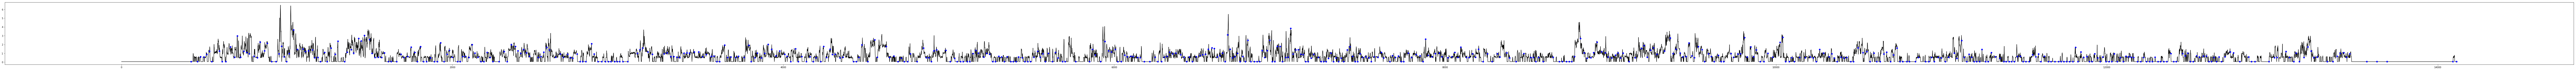

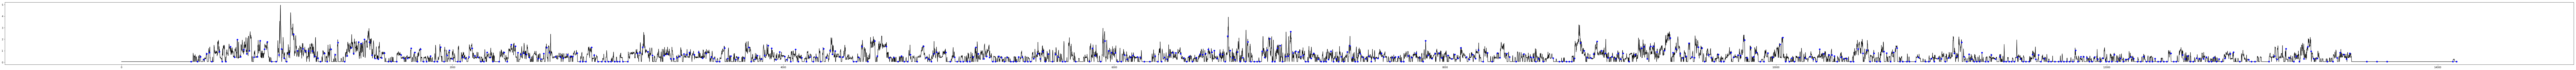

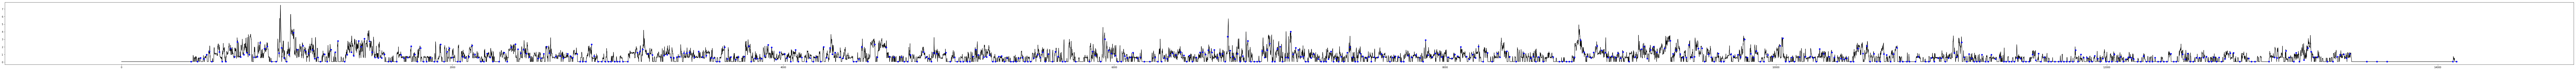

In [63]:
np_scene_boundary = np.array(scene_boundary_frames)
def frame_gaze(t):
    return bar_file_array_modified_parameters[t]
plt.figure(figsize=(200,5))
plt.plot(range(len(bar_file_array_modified_parameters)), bar_file_array_modified_parameters,'k', np_scene_boundary, frame_gaze(np_scene_boundary),'bo')
plt.show()

plt.figure(figsize=(200,5))
plt.plot(range(len(bar_file_array_emmanoise)), bar_file_array_emmanoise,'k', np_scene_boundary, bar_file_array_emmanoise[np_scene_boundary] ,'bo')
plt.show()

plt.figure(figsize=(200,5))
plt.plot(range(len(eyegaze)), eyegaze,'k', np_scene_boundary, eyegaze[np_scene_boundary],'bo')
plt.show()

In [1]:
list_of_movies = ["2days1night", "20thCWomen", "AfricanCats", "AgeofShadows", "AmericanHustle", "BabyDriver", "Bladerunner", "Childrenofmen", "Dark_knight", "GOTRS07E04", "Gravity", "IT",
"Kingsman2", "Merciless", "Moonlight", "Mother", "Once", "TokyoKazoku", "VIP", "ZeroDarkThirty", "MidnightinParis", "UsualSuspects", "KingsSpeech", "Moneyball","Basterds",
	"Oldboy", "BatmanBegins", "HarryPotter1", "100thlove", "HarryPotter7", "Wallflower",
	"KickAss", "Seven", "LateAutumn", "Dongmakgol", "500Summer", "Shame", "CrazyStupidLove",
	"HarryPotter3", "BeforeSunset", "NoCountryforOldMen", "ChoIn", "KillingMeSoftly"]
print(len(list_of_movies))

43


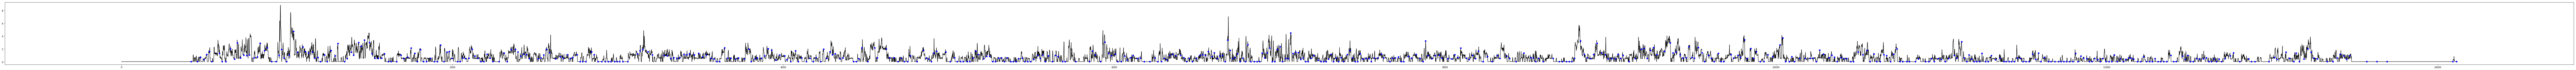

52


## Below is the trial version of shot delimeter which didn't work

In [34]:
obj_det_file = open("./Bladerunner_2fps_Detected_objects.csv", "r")

opf_list = [] # list of objects per frame
frame_no = 0

opf_list.append([])
obj_cnt = 0
for line in obj_det_file:
    split_string = line.split(",")
    if len(split_string) == 1:  #This is frame number line
        frame_no = int(split_string[0])
        opf_list.append([])
        #print(frame_no)
    else: # This is object information line
        object_type = split_string[1]
        prob = int(split_string[2])
#         if prob > 50:
        obj_cnt +=1
        left_X = int(split_string[3])
        right_X = int(split_string[4])
        top_Y = int(split_string[5])
        bottom_Y = int(split_string[6])

        mid_X = (left_X + right_X)//2
        mid_Y = (top_Y + bottom_Y)//2

        width = right_X - left_X
        height = bottom_Y - top_Y

        object_info = [object_type, prob, mid_X, mid_Y, width*height]
        opf_list[frame_no].append(object_info)
       
print("Object Count: %d", obj_cnt)

# print(opf_list)
# obj_frame_list = np.asarray(opf_list)
# print(obj_frame_list.shape)
# print(np.asarray(opf_list)[434])
# print(obj_frame_list[434][:])

print(opf_list[434][:])
print(np.mean(np.array([651,378])))

obj_avg_point_list = []

aspect_ratio = (1920,800)
for i in range(len(opf_list)):
    this_frame = opf_list[i]
    obj_cnt = len(this_frame)
    if  obj_cnt== 0:
#         obj_avg_point_list.append((aspect_ratio[0]//2, aspect_ratio[1]//2)) # When No objects, middle of screen 
        obj_avg_point_list.append((None, None))
    else:
        x_vector = np.zeros(obj_cnt)
        y_vector = np.zeros(obj_cnt)
        for j in range(obj_cnt):
            x_vector[j] = this_frame[j][2]
            y_vector[j] = this_frame[j][3]
        x_mean = np.mean(x_vector)
        y_mean = np.mean(y_vector)
        obj_avg_point_list.append((x_mean, y_mean))
        

print(obj_avg_point_list[434])
print(len(obj_avg_point_list))

fbyf_avg_dist = []
last_frame = (None, None)
for i in range(len(obj_avg_point_list)):
    this_frame = obj_avg_point_list[i]
    diff = -1.0
    if this_frame != (None, None):
        if last_frame != (None, None):
            diff = np.linalg.norm(np.array(this_frame)- np.array(last_frame))
        last_frame = this_frame
        fbyf_avg_dist.append(diff)
    else:
        fbyf_avg_dist.append(diff)
# print(fbyf_avg_dist)
print(len(fbyf_avg_dist))

shot_delimeter = []
for frame_no, diff in enumerate(fbyf_avg_dist):
    if diff < 0:
        continue
    elif diff > 300:
        shot_delimeter.append(frame_no)
print(len(shot_delimeter))
print(shot_delimeter)


Object Count: %d 18366
[['organism', 24, 651, 368, 13261], ['worker', 20, 378, 523, 36642]]
514.5
(514.5, 445.5)
14116
14116
1153
[462, 465, 493, 533, 535, 550, 601, 609, 611, 624, 625, 630, 632, 661, 663, 676, 684, 696, 697, 703, 706, 707, 709, 710, 721, 722, 732, 741, 762, 765, 766, 787, 789, 802, 822, 823, 827, 841, 845, 846, 847, 849, 854, 864, 884, 888, 895, 942, 943, 952, 954, 959, 969, 972, 981, 983, 1006, 1007, 1008, 1010, 1014, 1016, 1042, 1044, 1045, 1046, 1051, 1052, 1055, 1056, 1062, 1068, 1070, 1074, 1075, 1089, 1090, 1091, 1093, 1098, 1112, 1118, 1120, 1126, 1127, 1129, 1131, 1133, 1136, 1138, 1161, 1163, 1171, 1175, 1181, 1211, 1229, 1236, 1247, 1250, 1251, 1254, 1255, 1257, 1267, 1282, 1288, 1289, 1293, 1304, 1305, 1310, 1327, 1339, 1353, 1358, 1359, 1361, 1363, 1366, 1372, 1394, 1406, 1415, 1417, 1435, 1447, 1451, 1470, 1472, 1484, 1533, 1539, 1543, 1547, 1554, 1573, 1590, 1616, 1625, 1633, 1640, 1665, 1676, 1690, 1728, 1751, 1758, 1769, 1793, 1796, 1797, 1831, 1836, 1